In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# the confusion matrix is the basic of precision, recall, and F1 scores calculation.

def compute_confusion_matrix(actual, predicted):
    
    arary_actual = np.array(actual)
    array_pred = np.array(predicted)
    
    pd_actual = pd.Series(arary_actual, name='Actual')
    pd_predicted = pd.Series(array_pred, name='Predicted')

    pd_actual = pd.Categorical(pd_actual, categories=[0, 1])
    pd_predicted = pd.Categorical(pd_predicted, categories=[0, 1])

    CM =  pd.crosstab(pd_actual, pd_predicted, dropna=False)
    
    return CM


# the following calculation of precision, recall, and F1 scores are based on the function of the generated confusion matrix

def compute_precision(actual, predicted):
       
    CM =  compute_confusion_matrix(actual, predicted).to_numpy()  # CM is converted into a 2 X 2 array.
    
    TN = CM[0,0]; FP = CM[0,1]; FN = CM[1,0]; TP =  CM[1,1];
    
    precision = TP / (TP + FP)
    
    return precision

def compute_recall(actual, predicted):
    
    CM =  compute_confusion_matrix(actual, predicted).to_numpy()  # CM is converted into a 2 X 2 array.
    
    TN = CM[0,0]; FP = CM[0,1]; FN = CM[1,0]; TP =  CM[1,1];
    
    recall = TP / (TP + FN)
    
    return recall

def compute_F1_score(actual, predicted):
    
    precision = compute_precision(actual, predicted)
    recall = compute_recall(actual, predicted)
    
    F1_score = 2 * precision * recall / (precision + recall)
    
    return F1_score

# 6) write a function to generate the ROC curve

I am confused that what **a function** exactly means here. <br>
If it means a function that plots the ROC curve, so the function *plotting_roc_curve* can plot the ROC curve. <br>
But to plot the ROC curve, we need to get the tpr and fpr firstly. This is why the function *generate_ROC_elements* here. <br>
If a function is needed, do I need to combined this two functions?

In [3]:
# The usage of this function is to return the elements used for plotting a ROC, as same as the function roc_curve in sklearn.
# The output elemetns contains fprs, tprs and thresholds. 
# input arguments are y_label, y_prob, and target_label.
# target_label should be either 0 or 1 in our scenario. The defalt value is 1 in this function. 

def generate_ROC_elements(y_label, y_prob, target_label = 1):
    
    # gets the target label.
    if target_label == 0: non_target_label = 1
    if target_label == 1: non_target_label = 0
    
    # converts the input arguments into arrays.
    ar_y_label = np.array(y_label)
    ar_y_prob = np.array(y_prob)
    
    # creates a list to sort the results of predicted y. 
    y_pred = list(y_prob)
    
    # generates list to store the tpr, fpr and threshold.
    tpr_list = [0, 1]     
    fpr_list = [0, 1]
    thres_lish = [1, 0] 
    
    # using the for loop to predicte y based on the input y_prob. 
    for i, prob in enumerate(ar_y_prob):
        threshold = prob
        for index, y_prob in enumerate(ar_y_prob):
            if y_prob >= threshold:
                y_pred[index] = target_label
            else:
                y_pred[index] = non_target_label
        
        # uses the function to compute the confusion matrix, and gets the TN, FP, FN, TP. 
        CM = compute_confusion_matrix(y_label, y_pred).to_numpy()           
        TN = CM[0,0]; FP = CM[0,1]; FN = CM[1,0]; TP =  CM[1,1]
        
        # Calculates tpr and fpr. 
        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
    
        # adds the tpr, fpr and threshold into the corresponding lists. 
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        thres_lish.append(threshold)

    # when the for loop is end, generating a dataframe with the lists of threshold, fpr and tpr. 
    data = {'threshold':pd.Series(thres_lish), 'fpr':pd.Series(fpr_list), 'tpr':pd.Series(tpr_list)}
    df_roc = pd.DataFrame(data)
    
    # descending sorting the dataframe according to the threshold column
    df_roc.sort_values(by='threshold', ascending=False, inplace=True)
    
    return np.array(df_roc["fpr"]), np.array(df_roc["tpr"]), np.array(df_roc["threshold"])


# After using the function "generate_precision_recall_curve_elements" above to get the fprs, tprs,
# the following function uses the generated fprs and tprs to plot the ROC curve. 

def plotting_roc_curve(fpr, tpr, label = None): 
    
    plt.figure(figsize = (10, 10))
    
    # linewidth and fontsize
    lw = 2
    fontsize = 20
    
    # plot roc curve
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = label) 
    
    # plot y = x
    plt.plot([0, 1], [0, 1], color='navy', lw = lw, linestyle = '--')  
    
    # set the length of x axis and y axis. 
    plt.axis([0, 1, 0, 1.05])
    
    # add title, xlabel, ylabel, and legend. 
    plt.title(f'Receiver operating characteristic Curve ({label})', fontsize = fontsize)
    plt.xlabel('False Positive Rate', fontsize = fontsize)
    plt.ylabel('True Positive Rate', fontsize = fontsize)
    plt.legend(loc="lower right", fontsize = fontsize)
    
    plt.show()


# 7) write a function to compute AUC for the ROC curve

Our functions is used to calculate the AUC for a ROC curve. Therefore, I assume that **tpr, fpr** are known. <br>
If only **y_label** and **y_probability** are known, used the function *generate_ROC_elements(y_label, y_prob, target_label = 1)* above to generate the **fpr, tpr** firstly.

In [23]:
def calculate_auc(fpr_x_axis, tpr_y_axis):
    
    # Trapezoidal numerical integration 
    auc = np.trapz(tpr_y_axis, fpr_x_axis)
    
    return auc
    

# 8) Write a function to generate the precision-recall curve

Same confusion as 6).


In [4]:
# The usage of this function is to return the elements used for plotting a precision-recall curve.
# The output elemetns contains precisions, recalls and thresholds. 
# Input arguments are y_label, y_prob, and target_label.
# Target_label should be either 0 or 1 in our scenario. The defalt value is 1 in this function. 
# It is similar to the function used to generate tprs and fprs above. 

def generate_precision_recall_curve_elements(y_label, y_prob, target_label = 1):
    
    # gets the target label.
    if target_label == 0: non_target_label = 1
    if target_label == 1: non_target_label = 0
    
    # converts the input arguments into arrays.
    ar_y_label = np.array(y_label)
    ar_y_prob = np.array(y_prob)
    
    # creates a list to sort the results of predicted y. 
    y_pred = list(y_prob)
    
    # generates list to store the tpr, fpr and threshold.
    precision_list = []     
    recall_list = []
    thres_lish = []
    
    # using the for loop to predicte y based on the input y_prob. 
    
    for i, prob in enumerate(ar_y_prob):
        threshold = prob
        for index, y_prob in enumerate(ar_y_prob):
            if y_prob >= threshold:
                y_pred[index] = target_label
            else:
                y_pred[index] = non_target_label
        
        # uses the function to compute the confusion matrix, and gets the TN, FP, FN, TP. 
        CM = compute_confusion_matrix(y_label, y_pred).to_numpy()           
        TN = CM[0,0]; FP = CM[0,1]; FN = CM[1,0]; TP =  CM[1,1]
        
        # Calculates tpr and fpr. 
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
    
        # adds the tpr, fpr and threshold into the corresponding lists. 
        precision_list.append(precision)
        recall_list.append(recall)
        thres_lish.append(threshold)

    # when the for loop is end, generating a dataframe with the lists of threshold, fpr and tpr. 
    data = {'threshold':pd.Series(thres_lish), 'precision':pd.Series(precision_list), 'recall':pd.Series(recall_list)}
    df_roc = pd.DataFrame(data)
    
    # descending sorting the dataframe according to the threshold column
    df_roc.sort_values(by='threshold', ascending = True, inplace = True)
        
    return np.array(df_roc["precision"]), np.array(df_roc["recall"]), np.array(df_roc["threshold"])


# After using the function "generate_precision_recall_curve_elements" above to get the precisions, recalls and thresholds,
# the following function uses the generated precisions, recalls and thresholds to plot the precision-recall curve. 
    
def plotting_precision_recall_curves(precisions, recalls, thresholds):
    plt.figure(figsize = (10, 6))
    lw = 2
    fontsize = 20
    plt.plot(thresholds, precisions, "b--",  lw = lw, label = "Precision")
    plt.plot(thresholds, recalls, "g-",  lw = lw, label = "Recall")
    
    # set the length of x axis and y axis. 
    plt.axis([-0.05, 1.05, 0, 1.05])
    
    # add title, xlabel, ylabel, and legend. 
    plt.title(f'Precision-Recall curve', fontsize = fontsize)
    plt.xlabel('threshold', fontsize = fontsize)
    plt.legend(loc="lower right", fontsize = fontsize)
    
    plt.show()


# Example

In [5]:
import numpy as np
from sklearn import metrics

y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])

### fprs, tprs and thresholds in ROC curve 

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


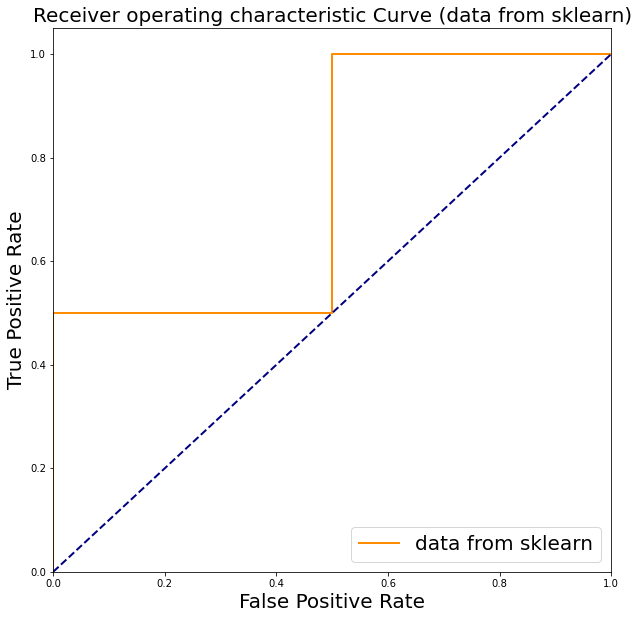

In [6]:
# Results using sklearn
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
print(fpr)
print(tpr)
print(thresholds)

plotting_roc_curve(fpr, tpr, label = "data from sklearn")

[0.  0.  0.5 0.5 1.  1. ]
[0.  0.5 0.5 1.  1.  1. ]
[1.   0.8  0.4  0.35 0.1  0.  ]


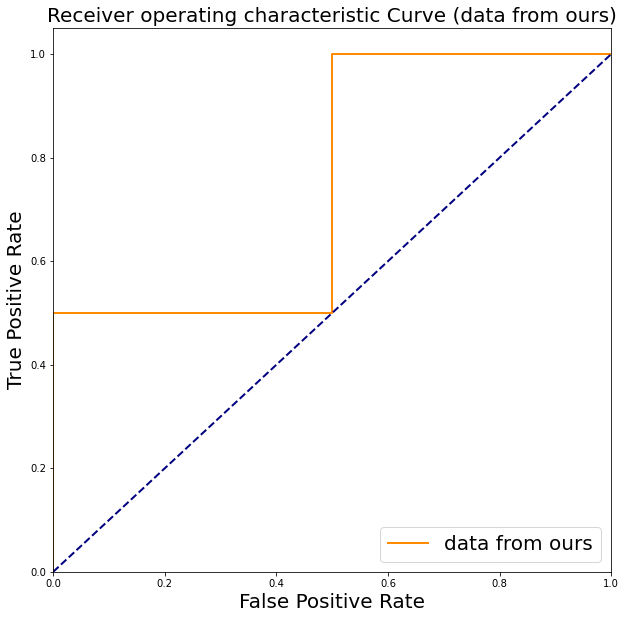

In [7]:
# Results using our function
fpr_our, tpr_our, thresholds_our = generate_ROC_elements(y, scores)
print(fpr_our)
print(tpr_our)
print(thresholds_our)

plotting_roc_curve(fpr_our, tpr_our, label = "data from ours")

# Same ROC curve!

### precisions, recalls and thresholds in precision-recall curve 

[0.66666667 0.5        1.         1.        ]
[1.  0.5 0.5 0. ]
[0.35 0.4  0.8 ]


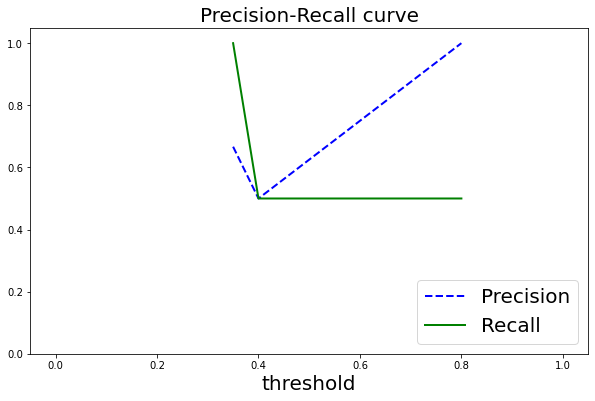

In [18]:
# Results using sklearn
precision, recall, thresholds = metrics.precision_recall_curve(y, scores)
print(precision)
print(recall)
print(thresholds)

plotting_precision_recall_curves(precision[:-1], recall[:-1], thresholds)

[0.5        0.66666667 0.5        1.        ]
[1.  1.  0.5 0.5]
[0.1  0.35 0.4  0.8 ]


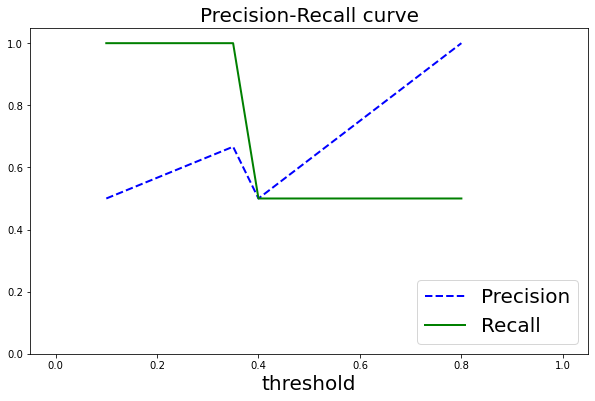

In [19]:
# Results using our function
preci_our, recall_our, thresholds_our = generate_precision_recall_curve_elements(y, scores)
print(preci_our)
print(recall_our)
print(thresholds_our)

plotting_precision_recall_curves(preci_our, recall_our, thresholds_our)

### I don't think we are wrong, although they are different.

# ROC calculation

In [26]:
# Roc from sklearn. which used the y_label and y_probability to calculate the auc.
metrics.roc_auc_score(y, scores)

0.75

In [27]:
# Roc from our function, which used the fpr and tpr. 
print(calculate_auc(fpr, tpr)) 
print(calculate_auc(fpr_our, tpr_our))

0.75
0.75
